In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn import metrics

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../Datasets/ALNY_processed.csv')
df1 = df.reset_index()['Close']

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [5]:
def build_and_train_model(X_train, y_train):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)
    return model

In [6]:
def predict_future(model, last_data, n_future, n_steps=100):
    temp_input = list(last_data)
    temp_input = temp_input[0].tolist()
    
    lst_output = []
    i = 0
    while i < n_future:
        if len(temp_input) > n_steps:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape(1, -1)
            x_input = x_input.reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
            
    return np.array(lst_output).reshape(-1, 1) 

In [7]:
def plot_predictions(df1, scaler, train_data, test_data, y_pred, lst_output, train_size, test_size, title):
    train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
    plt.plot(train_data_index, scaler.inverse_transform(train_data))

    test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
    plt.plot(test_data_index, scaler.inverse_transform(test_data))

    test_pred_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
    plt.plot(test_pred_index,scaler.inverse_transform(y_pred))

    prediect_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
    plt.plot(prediect_data_index_30, scaler.inverse_transform(lst_output[:30]))

    prediect_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
    plt.plot(prediect_data_index_60, scaler.inverse_transform(lst_output[30:60]))

    prediect_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
    plt.plot(prediect_data_index_90, scaler.inverse_transform(lst_output[60:90]))

    plt.legend(['Train', 'Test', 'Predict', 'Predict30days', 'Predict60days', 'Predict90days'])
    plt.title(title)
    plt.show()


In [8]:
def evaluate_model(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)*100
    return mae, rmse, mape

In [9]:
ratios = [0.7, 0.8, 0.6]
time_step = 100

# Results dictionary to store evaluation metrics for each ratio
results = {}

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.1315
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0147
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.0069
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0042
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0045
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0037
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0045
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0037
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0037
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0038
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0034
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0032
Epoch 13/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0028
Epoch 14/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0026
Epoch 15/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - lo

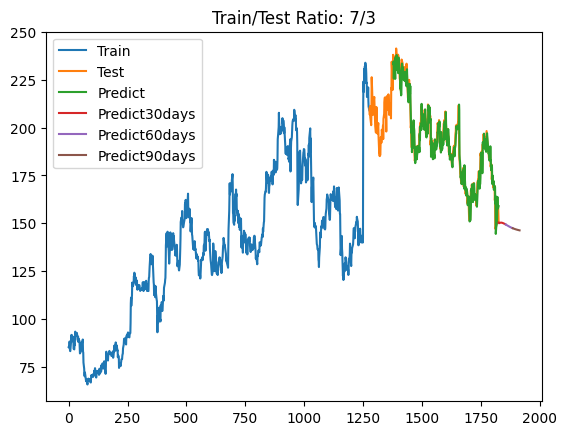

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - loss: 0.0871
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0075
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 0.0042
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0042
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0035
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - loss: 0.0035
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0036
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - loss: 0.0032
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - loss: 0.0033
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - loss: 0.0032
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - loss: 0.0027
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 145ms/step - loss: 0.0036
Epoch 13/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0029
Epoch 14/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.0026
Epoch 15/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 

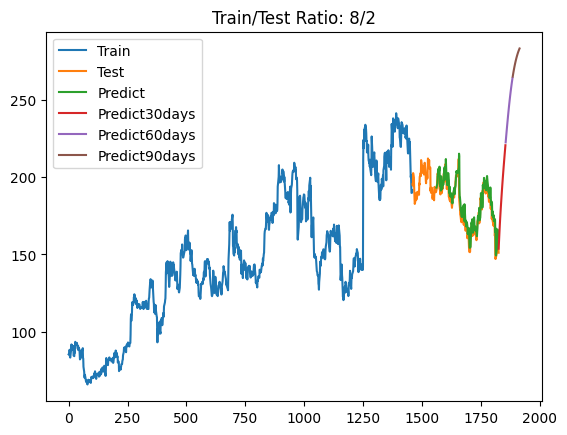

Epoch 1/100


c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0859
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.0094
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0038
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0029
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - loss: 0.0028
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - loss: 0.0027
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - loss: 0.0028
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0027
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - loss: 0.0024
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - loss: 0.0024
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0022
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - loss: 0.0021
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - loss: 0.0021
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - loss: 0.0020
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step -

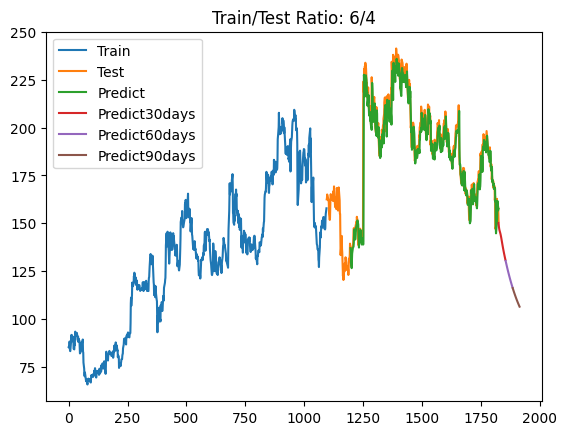

Ratio 7/3: MAE = 2.477496426446098, RMSE = 3.4332925079169554, MAPE = 1.2804238019724834
Ratio 8/2: MAE = 3.3700404950987624, RMSE = 4.269030041617381, MAPE = 1.8940799513012165
Ratio 6/4: MAE = 3.3949913809640075, RMSE = 5.340590042051829, MAPE = 1.729494592156056


In [10]:
for ratio in ratios:
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    training_size = int(len(df1) * ratio)
    test_size = len(df1) - training_size
    train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

    # Tạo tập huấn luyện và kiểm tra
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Xây dựng và huấn luyện mô hình
    model = build_and_train_model(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)

    # Đảo ngược quá trình chuẩn hóa
    y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler.inverse_transform(y_pred)

    # Đánh giá mô hình
    mae, rmse, mape = evaluate_model(y_test_inv, y_pred_inv)
    results[f'Ratio {int(ratio*10)}/{10-int(ratio*10)}'] = {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

    # Dự đoán các giá trị trong tương lai
    last_data = test_data[-time_step:].reshape(1, -1)
    lst_output = predict_future(model, last_data, 90)

    # Vẽ biểu đồ
    plot_predictions(df1, scaler, train_data, test_data, y_pred, lst_output, training_size, test_size, f"Train/Test Ratio: {int(ratio*10)}/{10-int(ratio*10)}")

# In kết quả đánh giá
for ratio, metrics in results.items():
    print(f'{ratio}: MAE = {metrics["MAE"]}, RMSE = {metrics["RMSE"]}, MAPE = {metrics["MAPE"]}')